In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
# Load image from given file path

def load_image(file_path: str) -> np.ndarray:
    image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        raise FileNotFoundError(f"Cannot load image at {file_path}")
    return image

# Save image to file

def save_image(image: np.ndarray, file_path: str) -> None:
    cv2.imwrite(file_path, image)


In [ ]:
# Add Gaussian noise (normally distributed random values)

def add_gaussian_noise(image: np.ndarray, mean: float = 0.0, sigma: float = 10.0) -> np.ndarray:
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image.astype(np.float32) + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)


In [ ]:
# Add salt and pepper noise (random white and black pixels)

def add_salt_and_pepper_noise(image: np.ndarray, salt_prob: float = 0.01, pepper_prob: float = 0.01) -> np.ndarray:
    noisy_image = image.copy()
    total_pixels = image.shape[0] * image.shape[1]

    # Salt (white) noise
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i, num_salt) for i in image.shape[:2]]
    if image.ndim == 2:
        noisy_image[coords[0], coords[1]] = 255
    else:
        noisy_image[coords[0], coords[1]] = [255] * image.shape[2]

    # Pepper (black) noise
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape[:2]]
    if image.ndim == 2:
        noisy_image[coords[0], coords[1]] = 0
    else:
        noisy_image[coords[0], coords[1]] = [0] * image.shape[2]

    return noisy_image


In [ ]:
# Add Poisson noise (based on Poisson distribution)

def add_poisson_noise(image: np.ndarray) -> np.ndarray:
    image_float = image.astype(np.float32)
    noisy = np.random.poisson(image_float).astype(np.float32)
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)


In [ ]:
# Add Uniform noise (random values from a uniform range)

def add_uniform_noise(image: np.ndarray, low: float = -20.0, high: float = 20.0) -> np.ndarray:
    noise = np.random.uniform(low, high, image.shape)
    noisy_image = image.astype(np.float32) + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)


In [ ]:
# Display original and noisy images side-by-side

def display_images(original: np.ndarray, processed: np.ndarray, title: str) -> None:
    def to_rgb(image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if image.ndim == 3 else image

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(to_rgb(original), cmap='gray' if original.ndim == 2 else None)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(to_rgb(processed), cmap='gray' if processed.ndim == 2 else None)
    plt.title(title)
    plt.axis('off')

    plt.tight_layout()
    plt.show()


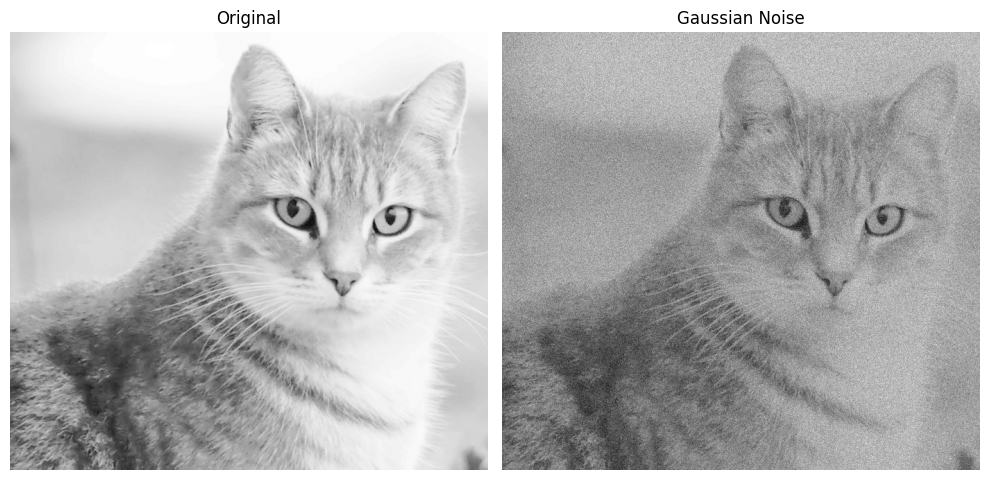

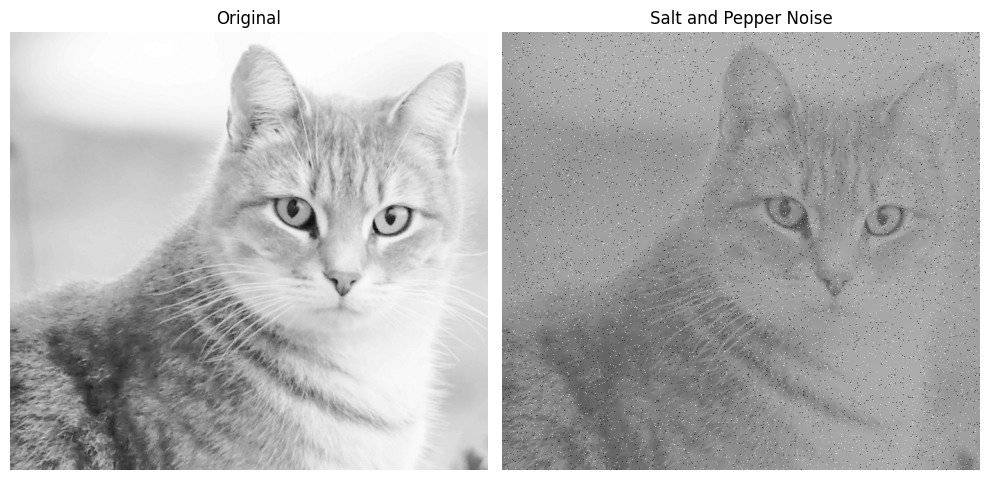

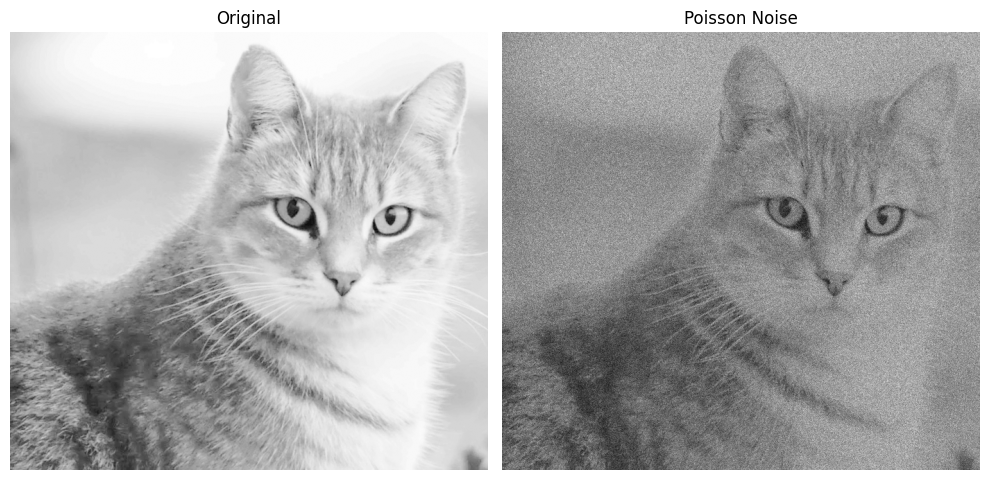

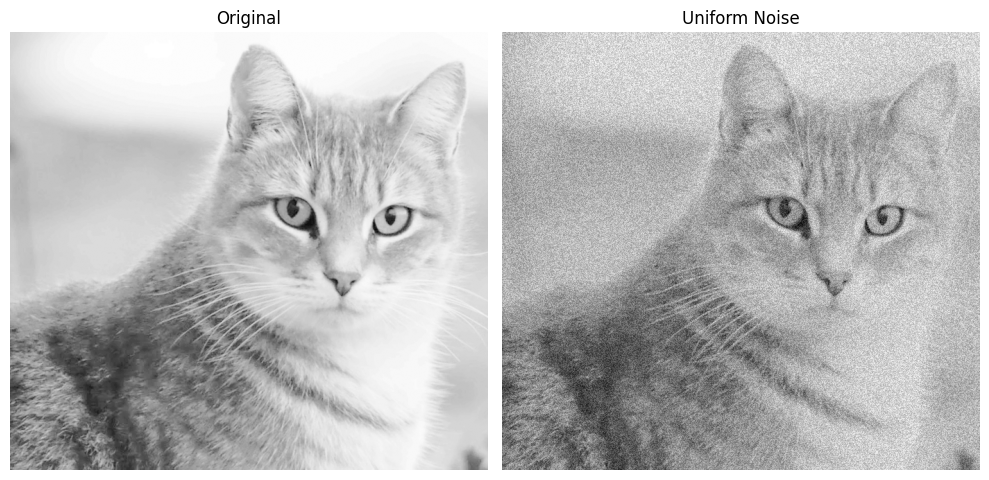

In [8]:
if __name__ == '__main__':
    input_file = 'data/hello.png'  # Change this to your image path
    original_image = load_image(input_file)

    # Gaussian Noise
    gaussian = add_gaussian_noise(original_image)
    save_image(gaussian, 'data/hello_gaussian.png')
    display_images(original_image, gaussian, 'Gaussian Noise')

    # Salt & Pepper Noise
    sp = add_salt_and_pepper_noise(original_image)
    save_image(sp, 'data/hello_salt_pepper.png')
    display_images(original_image, sp, 'Salt and Pepper Noise')

    # Poisson Noise
    poisson = add_poisson_noise(original_image)
    save_image(poisson, 'data/hello_poisson.png')
    display_images(original_image, poisson, 'Poisson Noise')

    # Uniform Noise
    uniform = add_uniform_noise(original_image)
    save_image(uniform, 'data/hello_uniform.png')
    display_images(original_image, uniform, 'Uniform Noise')
